In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

## Cotizaciones Desembolso
Todas las variables son discretas. Mayoria de numericas con distribucion uniforme, exceptuando PLAZO. Son los acuerdos de cotizaciones, incluyendo el periodo de desembolso. Tambien indica si se ha perdido la cotizacion o se tiene en espera. Se deberia ver la relacion con el target.

In [16]:
# Reading dataset
df_cotizaciones_desembolso = pd.read_csv("../data/DATA_COTIZACIONES_DESEMBOLSO_F.csv")

In [17]:
df_cotizaciones_desembolso.head().T

,0,1,2,3,4
PERIODO,201707,201803,201704,201709,201808
ID_CLIENTE,7478,27693,54392,52553,89268
ESTADO,TARIFARIO,PERDIDA,TARIFARIO,TARIFARIO,TARIFARIO
ESTADO_DESEMBOLSO_COTIZA,DESEMBOLSADA,NaN,PENDIENTE,PENDIENTE,PENDIENTE
DIVISA,USD,PEN,USD,PEN,PEN
RGO_IMPORTE,4,17,3,19,9
UNIDAD_PLAZO,MES,MES,MES,MES,MES
PLAZO,3,4,12,8,9
GARANTIA,NO DINERARIA,SIN GARANTÍA,SIN GARANTÍA,SIN GARANTÍA,SIN GARANTÍA
RGO_TEA_SUGERIDA,2,2,2,3,3


In [18]:
df_cotizaciones_desembolso.shape

(9561, 13)

In [19]:
df_cotizaciones_desembolso.describe().T

,count,mean,std,min,25%,50%,75%,max
PERIODO,9561.0,201767.063905,57.271025,201701.0,201708.0,201802.0,201808.0,201901.0
ID_CLIENTE,9561.0,49962.687794,28914.809186,5.0,24508.0,51531.0,74447.0,99971.0
RGO_IMPORTE,9561.0,10.507165,5.771519,1.0,5.0,11.0,15.0,20.0
PLAZO,9561.0,12.844159,35.436530,1.0,4.0,6.0,12.0,1826.0
RGO_TEA_SUGERIDA,9561.0,10.545968,5.562220,1.0,6.0,10.0,15.0,20.0
PERIODO_DESEMB,3929.0,201817.544159,30.706268,201801.0,201804.0,201807.0,201811.0,201904.0
RGO_IMPORTE_DESEMBOLSADO_MN,9561.0,10.095388,5.711427,1.0,5.0,10.0,15.0,20.0
RGO_TASA_DESEMBOLSO,9561.0,10.098525,5.778524,1.0,5.0,10.0,15.0,20.0


In [48]:
df_cotizaciones_desembolso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9561 entries, 0 to 9560
Data columns (total 13 columns):
PERIODO                        9561 non-null int64
ID_CLIENTE                     9561 non-null int64
ESTADO                         9561 non-null object
ESTADO_DESEMBOLSO_COTIZA       8698 non-null object
DIVISA                         9561 non-null object
RGO_IMPORTE                    9561 non-null int64
UNIDAD_PLAZO                   9561 non-null object
PLAZO                          9561 non-null int64
GARANTIA                       9561 non-null object
RGO_TEA_SUGERIDA               9561 non-null int64
PERIODO_DESEMB                 3929 non-null float64
RGO_IMPORTE_DESEMBOLSADO_MN    9561 non-null int64
RGO_TASA_DESEMBOLSO            9561 non-null int64
dtypes: float64(1), int64(7), object(5)
memory usage: 971.1+ KB


## Variables numéricas

Rango Monto solicitado de prestamo comercial en moneda de la divisa

In [23]:
df_cotizaciones_desembolso.RGO_IMPORTE.value_counts(dropna=False).sort_index() #Puede que haya mezcla de monedas

1     497
2     519
3     469
4     449
5     477
6     456
7     500
8     409
9     434
10    498
11    496
12    450
13    522
14    474
15    531
16    477
17    507
18    499
19    474
20    423
Name: RGO_IMPORTE, dtype: int64

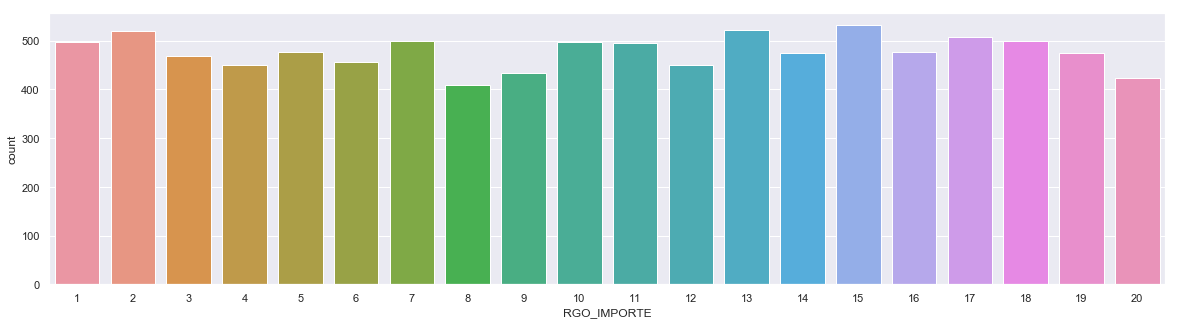

In [46]:
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'RGO_IMPORTE', data = df_cotizaciones_desembolso) 

Número de cuotas a pagar

In [26]:
df_cotizaciones_desembolso.PLAZO.value_counts(dropna=False).sort_index()

1        157
2        710
3       1496
4       1115
5        197
6       1618
7        101
8        614
9        139
10       214
11        32
12      1428
13         2
14        16
15        17
16         6
17         2
18       729
19         1
20         3
22         9
23         3
24       539
30        12
36         7
40         2
45         8
48         1
50         1
60        28
64         1
70         1
72         4
75         1
80         1
84         5
90       173
96         2
100        1
106        8
108        8
110        2
120       66
150       26
167        1
168        1
180       43
210        2
330        1
396        4
546        1
1826       2
Name: PLAZO, dtype: int64

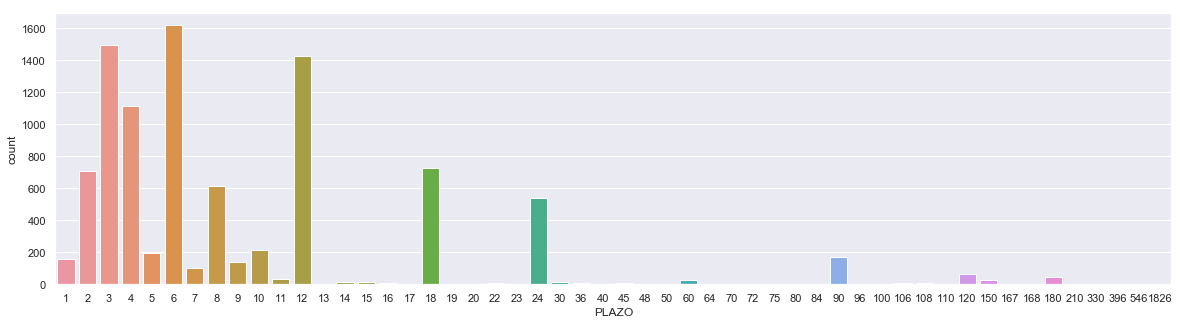

In [45]:
# Concentracion en primer año, cuotas multiplo de 30.
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'PLAZO', data = df_cotizaciones_desembolso) 

Tasa del prestamo sugerida por el banco (RGO_TEA_SUGERIDA)

In [28]:
df_cotizaciones_desembolso.RGO_TEA_SUGERIDA.value_counts(dropna=False).sort_index()

1     236
2     488
3     505
4     513
5     503
6     514
7     532
8     531
9     492
10    477
11    508
12    530
13    503
14    465
15    475
16    481
17    431
18    454
19    495
20    428
Name: RGO_TEA_SUGERIDA, dtype: int64

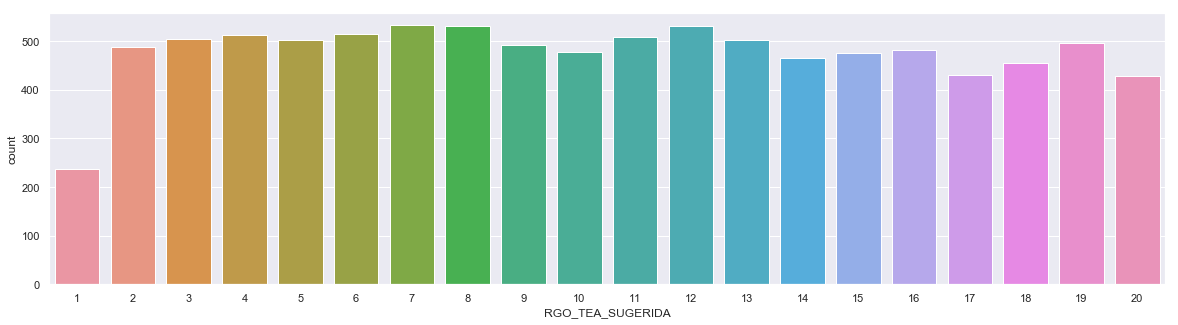

In [44]:
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'RGO_TEA_SUGERIDA', data = df_cotizaciones_desembolso) 

Mes del desembolso del prestamo comercial (PERIODO_DESEMB)

In [30]:
df_cotizaciones_desembolso.PERIODO_DESEMB.value_counts(dropna=False).sort_index() #many nans

201801.0     337
201802.0     304
201803.0     316
201804.0     302
201805.0     233
201806.0     221
201807.0     275
201808.0     321
201809.0     276
201810.0     302
201811.0     265
201812.0     317
201901.0     346
201902.0      67
201903.0      45
201904.0       2
NaN         5632
Name: PERIODO_DESEMB, dtype: int64

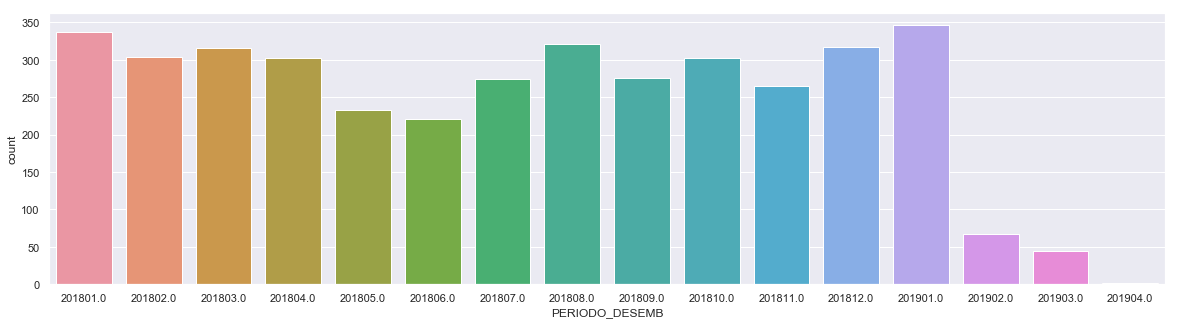

In [38]:
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'PERIODO_DESEMB', data = df_cotizaciones_desembolso) 

Monto desembolsado en moneda nacional (RGO_IMPORTE_DESEMBOLSADO_MN) (extraño, ojo por error en nombre de var)

In [40]:
df_cotizaciones_desembolso.RGO_IMPORTE_DESEMBOLSADO_MN.value_counts(dropna=False).sort_index()

1     488
2     515
3     523
4     498
5     511
6     525
7     522
8     517
9     528
10    543
11    491
12    464
13    443
14    432
15    420
16    384
17    425
18    446
19    427
20    459
Name: RGO_IMPORTE_DESEMBOLSADO_MN, dtype: int64

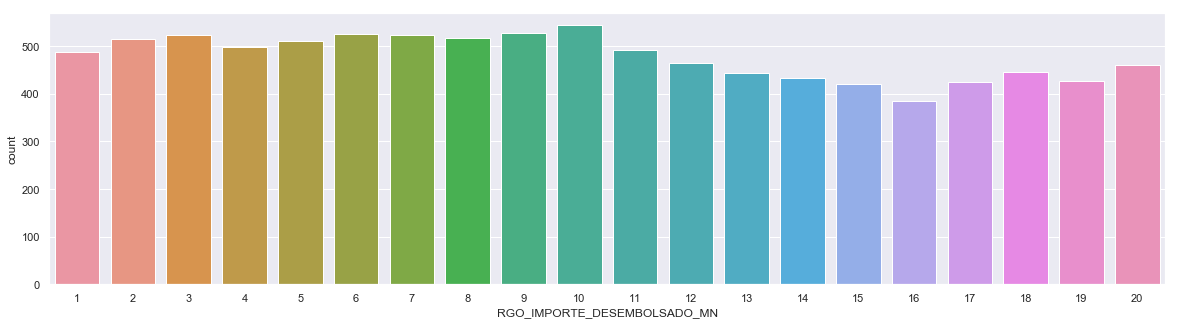

In [41]:
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'RGO_IMPORTE_DESEMBOLSADO_MN', data = df_cotizaciones_desembolso) 

Tasa del prestamo acordado con el cliente al momento del desembolso (RGO_TASA_DESEMBOLSO)

In [42]:
df_cotizaciones_desembolso.RGO_TASA_DESEMBOLSO.value_counts(dropna=False).sort_index()

1     536
2     513
3     524
4     509
5     503
6     518
7     516
8     519
9     504
10    521
11    511
12    365
13    426
14    448
15    420
16    434
17    438
18    444
19    484
20    428
Name: RGO_TASA_DESEMBOLSO, dtype: int64

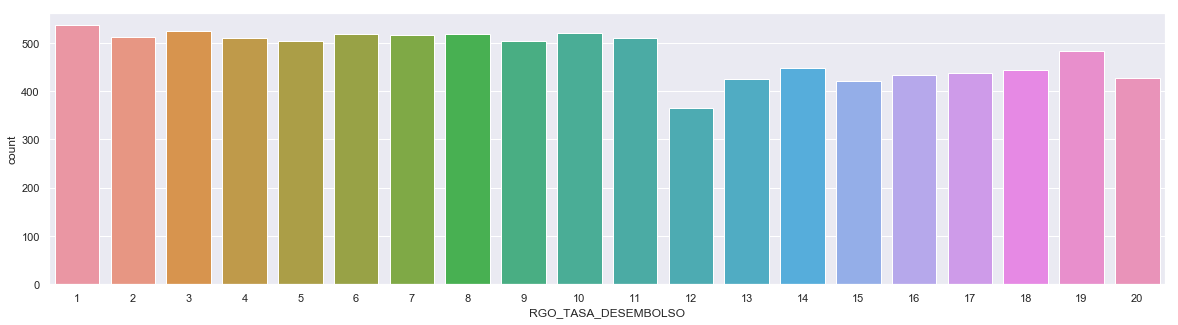

In [43]:
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'RGO_TASA_DESEMBOLSO', data = df_cotizaciones_desembolso) 

## Variables categóricas

Situación de la solicitud (ESTADO)

In [47]:
df_cotizaciones_desembolso.ESTADO.value_counts(dropna=False).sort_index() 

APROBADA      4605
DEVUELTA       235
MODIFICADA     293
PERDIDA        281
RECUPERADA      47
SOLICITADA       5
TARIFARIO     4095
Name: ESTADO, dtype: int64

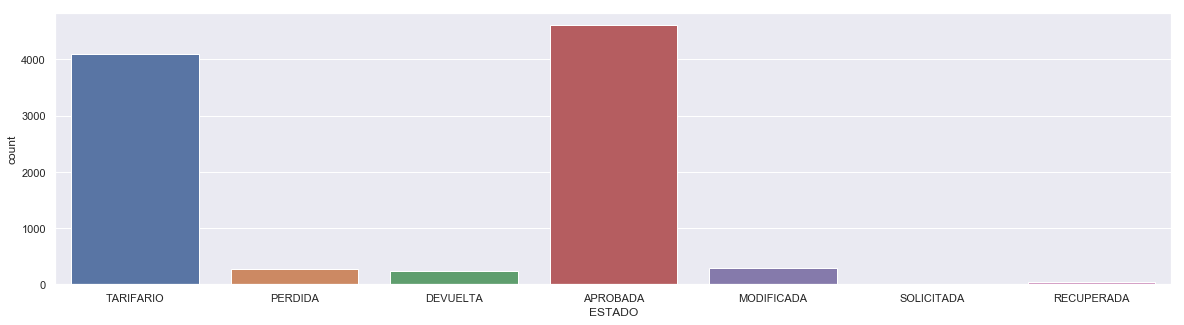

In [49]:
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'ESTADO', data = df_cotizaciones_desembolso) #Ojo con esta var, TARIFARIO???

Situación del desembolso de la solicitud (ESTADO_DESEMBOLSO_COTIZA)

In [51]:
df_cotizaciones_desembolso.ESTADO_DESEMBOLSO_COTIZA.value_counts(dropna=False).sort_index()

DESEMBOLSADA    3692
PENDIENTE       5006
NaN              863
Name: ESTADO_DESEMBOLSO_COTIZA, dtype: int64

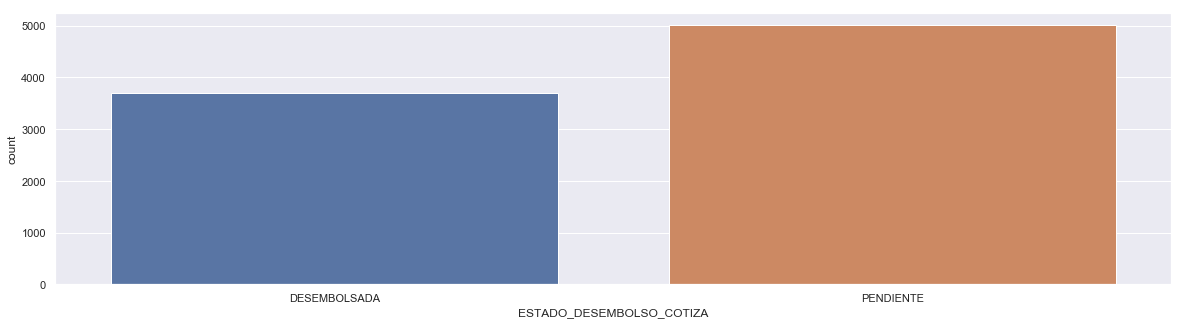

In [52]:
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'ESTADO_DESEMBOLSO_COTIZA', data = df_cotizaciones_desembolso) 

Tipo de moneda soles o dolares (DIVISA)

In [54]:
df_cotizaciones_desembolso.DIVISA.value_counts(dropna=False).sort_index()

PEN    7810
USD    1751
Name: DIVISA, dtype: int64

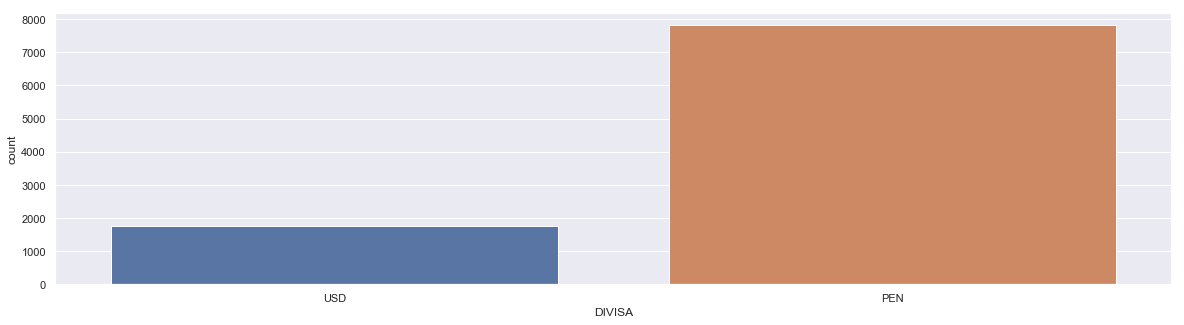

In [56]:
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'DIVISA', data = df_cotizaciones_desembolso) 

Periodicidad del pago (UNIDAD_PLAZO)

In [58]:
df_cotizaciones_desembolso.UNIDAD_PLAZO.value_counts(dropna=False).sort_index() # existen pagos diarios.

DIA     374
MES    9187
Name: UNIDAD_PLAZO, dtype: int64

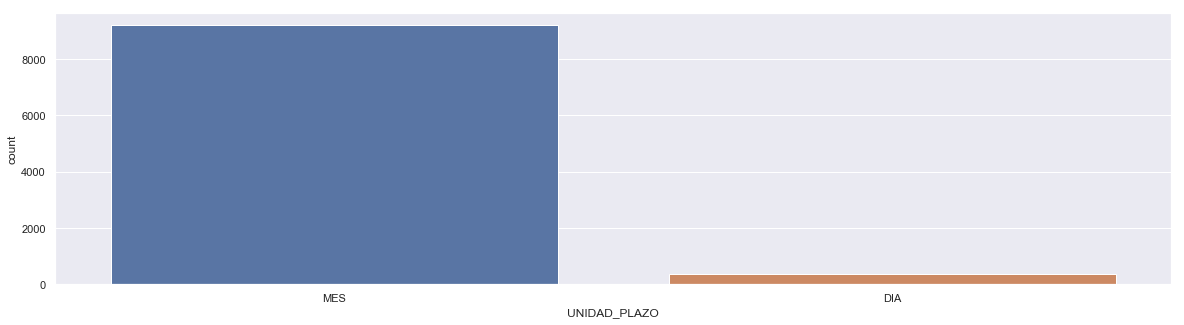

In [59]:
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'UNIDAD_PLAZO', data = df_cotizaciones_desembolso) 

Tipos de garantias como respaldo a la solicitud del prestamo (GARANTIA)

In [61]:
df_cotizaciones_desembolso.GARANTIA.value_counts(dropna=False).sort_index() # LIMPIAR!

DINERARIA        151
NO DINERARIA    4631
SIN GARANTIA       8
SIN GARANTÍA    4771
Name: GARANTIA, dtype: int64

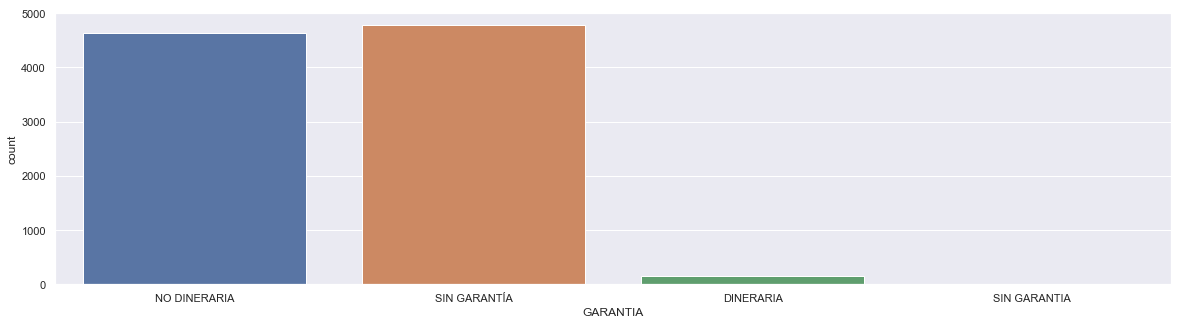

In [62]:
plt.figure(figsize=(20,5))
plot = sns.countplot(x = 'GARANTIA', data = df_cotizaciones_desembolso) 

## Revisiones generales y por ventanas de tiempo

In [63]:
df_cotizaciones_desembolso.sort_values("ID_CLIENTE", inplace = True)
bool_series = df_cotizaciones_desembolso["ID_CLIENTE"].duplicated()
df_cotizaciones_desembolso[bool_series] 

,PERIODO,ID_CLIENTE,ESTADO,ESTADO_DESEMBOLSO_COTIZA,DIVISA,RGO_IMPORTE,UNIDAD_PLAZO,PLAZO,GARANTIA,RGO_TEA_SUGERIDA,PERIODO_DESEMB,RGO_IMPORTE_DESEMBOLSADO_MN,RGO_TASA_DESEMBOLSO
7078,201811,5,TARIFARIO,PENDIENTE,PEN,12,MES,12,NO DINERARIA,6,201812.0,15,15
7071,201812,5,TARIFARIO,PENDIENTE,PEN,15,MES,12,NO DINERARIA,12,201812.0,17,15
5428,201702,96,APROBADA,DESEMBOLSADA,PEN,10,MES,6,NO DINERARIA,17,NaN,7,11
2604,201702,96,APROBADA,DESEMBOLSADA,PEN,9,MES,12,NO DINERARIA,10,NaN,6,6
9060,201810,96,TARIFARIO,PENDIENTE,PEN,15,MES,3,NO DINERARIA,14,201810.0,17,19
9059,201811,96,TARIFARIO,PENDIENTE,PEN,15,MES,3,NO DINERARIA,14,201811.0,17,19
510,201705,96,APROBADA,DESEMBOLSADA,PEN,9,MES,12,NO DINERARIA,10,NaN,1,1
7871,201806,96,APROBADA,PENDIENTE,PEN,9,MES,12,NO DINERARIA,8,201806.0,14,17
7918,201901,96,APROBADA,DESEMBOLSADA,PEN,9,MES,24,NO DINERARIA,13,201901.0,13,17
5574,201707,96,TARIFARIO,DESEMBOLSADA,PEN,9,MES,12,NO DINERARIA,9,NaN,10,11


Cotizaciones pueden ser multiples por cliente.

In [64]:
df_cotizaciones_desembolso.sort_values(["ID_CLIENTE","PERIODO"], inplace = True)
bool_series = df_cotizaciones_desembolso[["ID_CLIENTE","PERIODO"]].duplicated()
df_cotizaciones_desembolso[bool_series] 

,PERIODO,ID_CLIENTE,ESTADO,ESTADO_DESEMBOLSO_COTIZA,DIVISA,RGO_IMPORTE,UNIDAD_PLAZO,PLAZO,GARANTIA,RGO_TEA_SUGERIDA,PERIODO_DESEMB,RGO_IMPORTE_DESEMBOLSADO_MN,RGO_TASA_DESEMBOLSO
2604,201702,96,APROBADA,DESEMBOLSADA,PEN,9,MES,12,NO DINERARIA,10,NaN,6,6
2797,201702,96,PERDIDA,NaN,PEN,9,MES,12,NO DINERARIA,9,NaN,11,6
3884,201703,96,APROBADA,DESEMBOLSADA,PEN,6,MES,2,NO DINERARIA,17,NaN,3,8
1696,201705,96,APROBADA,DESEMBOLSADA,PEN,7,MES,2,NO DINERARIA,18,NaN,7,4
2801,201705,96,APROBADA,DESEMBOLSADA,PEN,9,MES,12,NO DINERARIA,11,NaN,11,6
3942,201706,96,APROBADA,DESEMBOLSADA,PEN,7,MES,12,NO DINERARIA,11,NaN,5,8
4349,201710,96,TARIFARIO,DESEMBOLSADA,PEN,9,MES,12,NO DINERARIA,3,NaN,3,9
2222,201803,264,APROBADA,PENDIENTE,PEN,5,MES,6,SIN GARANTÍA,10,NaN,8,5
4596,201806,264,APROBADA,PENDIENTE,PEN,3,MES,7,SIN GARANTÍA,13,NaN,9,9
7684,201807,377,APROBADA,PENDIENTE,PEN,1,MES,18,SIN GARANTÍA,16,201807.0,12,16


Cotizaciones pueden ser multiples EN UN MISMO PERIODO por cliente.

REVISAR si tiene un plazo de deuda pendiente?
REVISAR si la columna de ESTADO Y ESTADO DESEMBOLSO conversan. Cual es valida?